# 1. Gathering the Data
* Goal: Collect training and testing datasets from Kaggle (or similar sources).
* Dataset Structure:
132 columns for symptoms (features).
1 column for the prognosis (target variable).

In [87]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [88]:
data = pd.read_csv("Training.csv")
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [90]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [91]:
data["Unnamed: 133"]

,Unnamed: 133
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4915,NaN
4916,NaN
4917,NaN
4918,NaN


In [92]:
data.drop(columns = "Unnamed: 133", inplace = True)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [93]:
data.describe(include = "all")

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [94]:
data.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [95]:
data.duplicated().sum()

4616

In [96]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [97]:
# checking imbalnce
class_counts = data["prognosis"].value_counts()
class_counts

,count
prognosis,
Hepatitis D,10
Dengue,10
Chicken pox,10
Migraine,10
Hepatitis B,9
Hypoglycemia,9
Common Cold,9
Tuberculosis,9
Hepatitis E,9


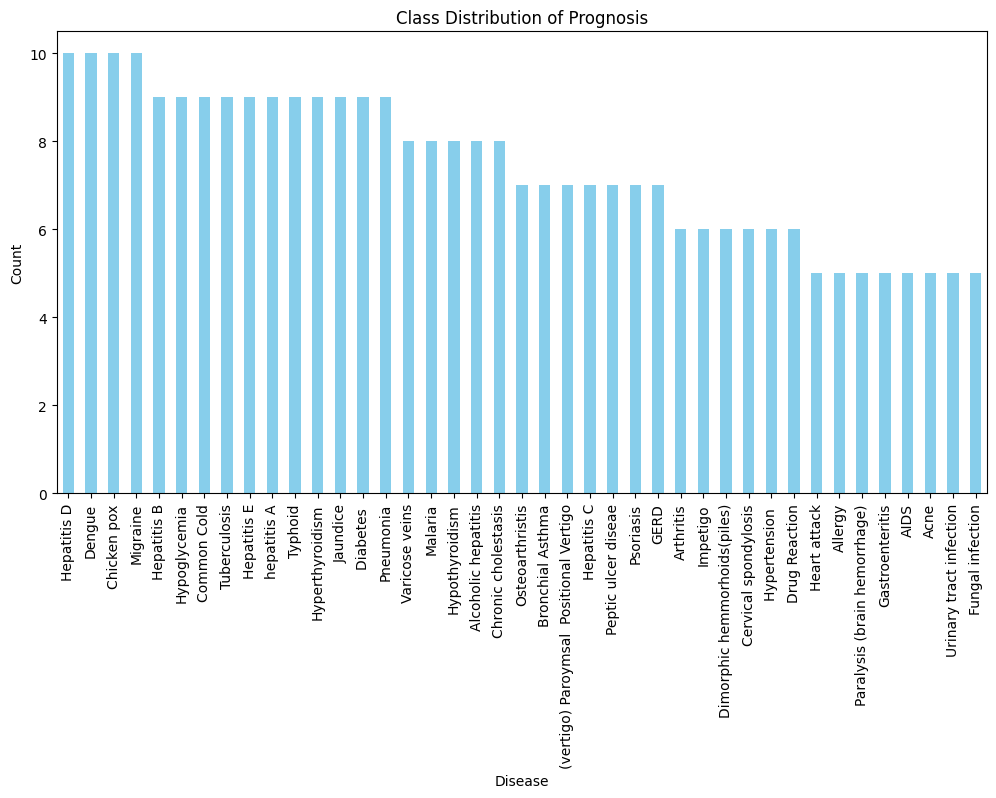

In [98]:
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Prognosis')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [99]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [100]:
data["prognosis"]

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
402,Impetigo
403,Impetigo
405,Impetigo
406,Impetigo


In [101]:
# Label encoding 'prognosis' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["prognosis"] = le.fit_transform(data["prognosis"])


In [102]:
# Get mapping of labels to integers
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping:", label_mapping)


Label Mapping: {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [103]:

# spliting the data
X = data.drop(columns = "prognosis")
y = data["prognosis"]
print(X.shape)
print(y.shape)

(304, 132)
(304,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 132)
(61, 132)
(243,)
(61,)


SVM Accuracy: 1.00


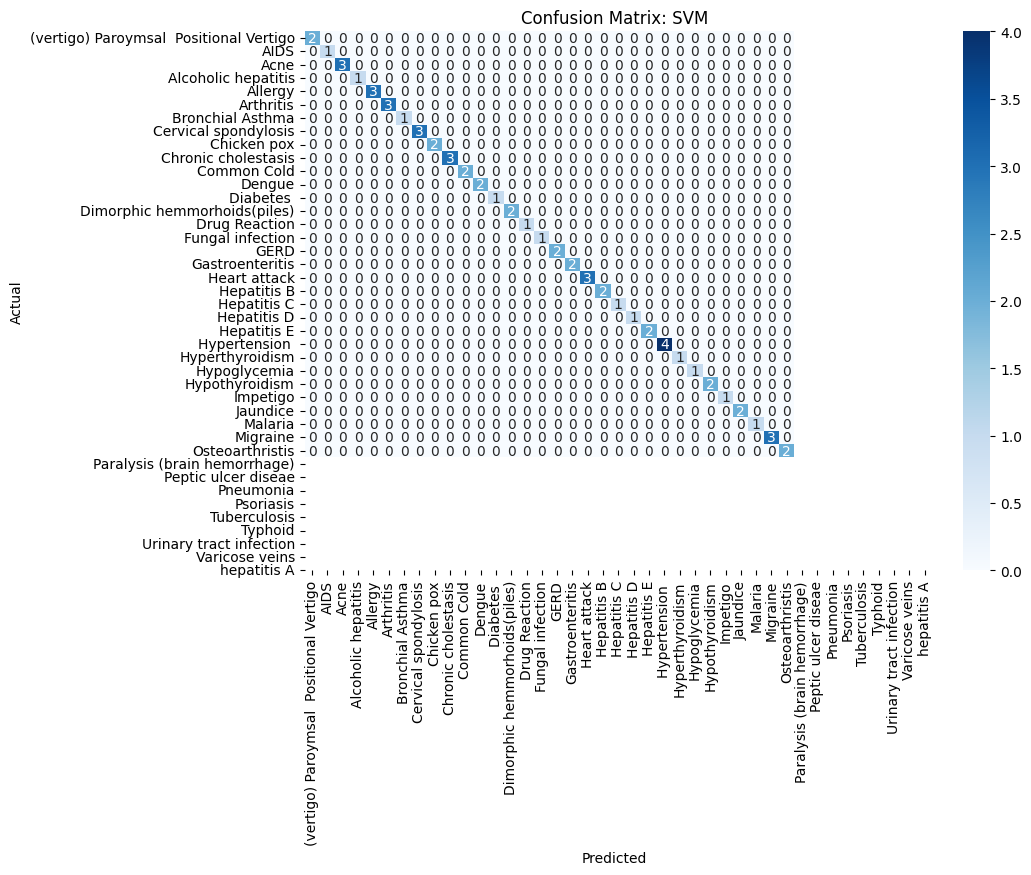

Naive Bayes Accuracy: 1.00


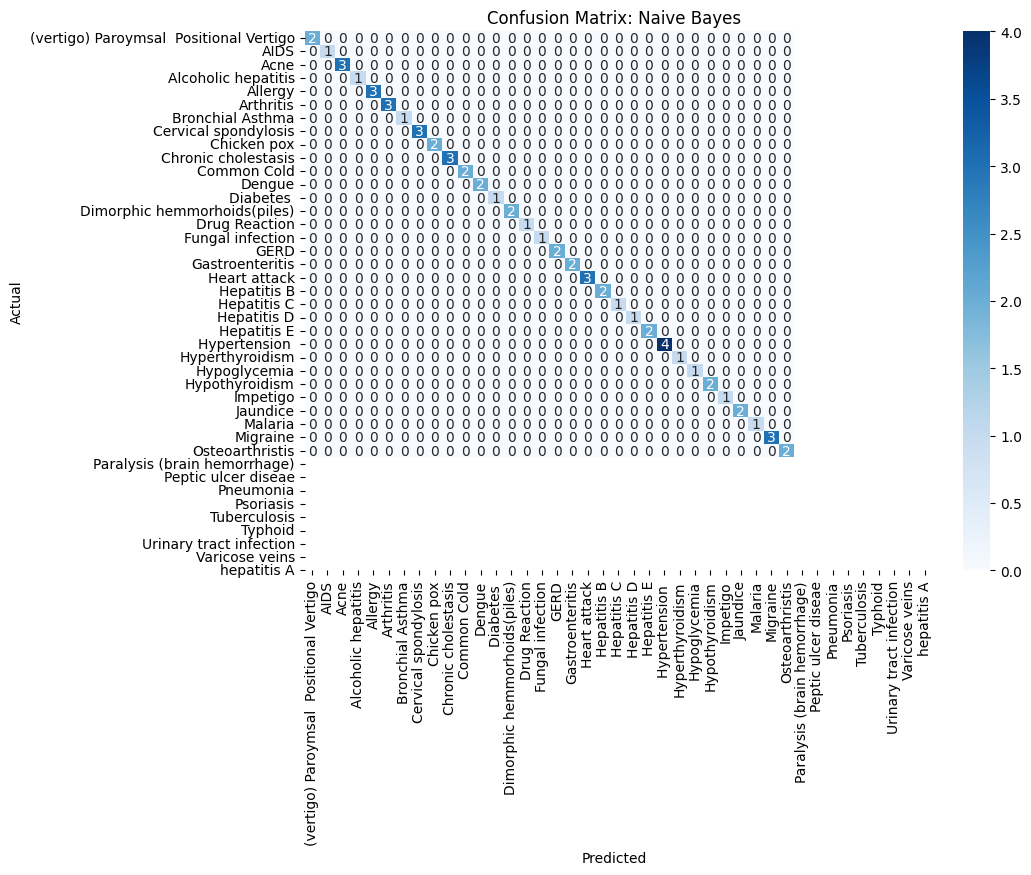

Random Forest Accuracy: 1.00


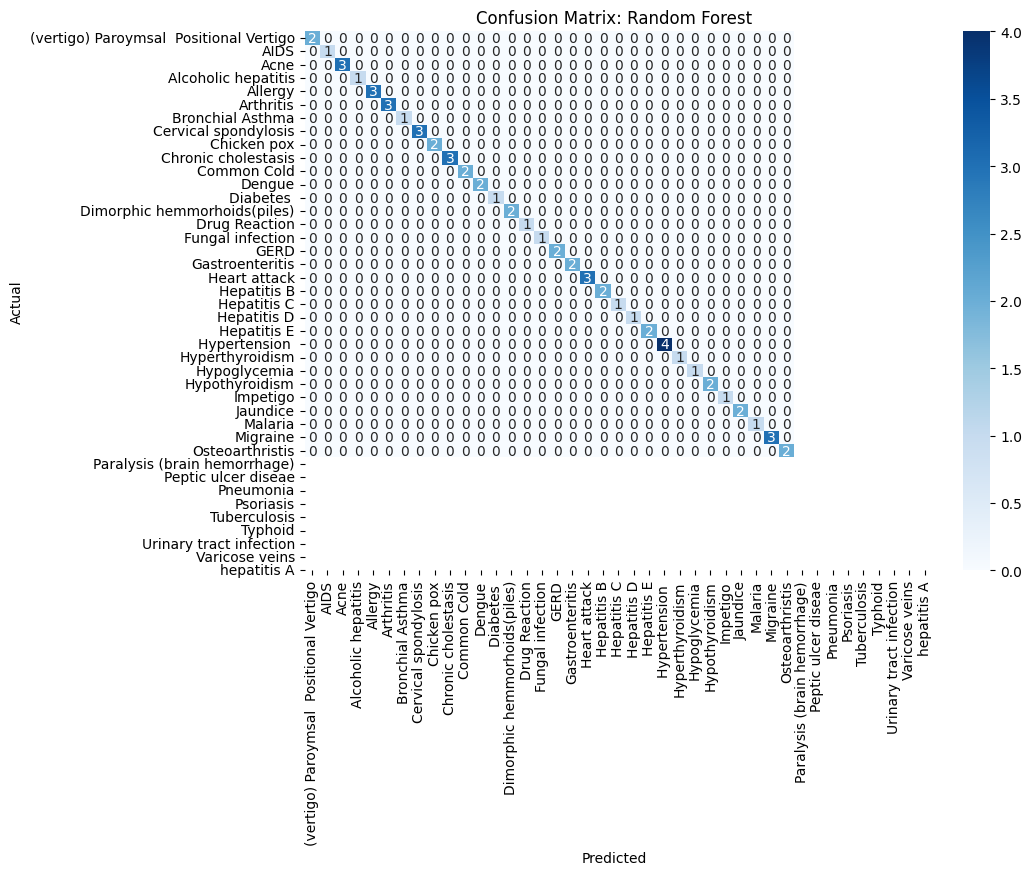

In [106]:
models = {
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}


def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy:.2f}")


        conf_matrix = confusion_matrix(y_test, y_pred)


        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix: {model_name}')
        plt.show()


train_and_evaluate(models, X_train, X_test, y_train, y_test)

In [113]:
import joblib

# Assuming `models` is a dictionary containing all your trained models
for model_name, model in models.items():
    joblib.dump(model, f"{model_name}_model.joblib")
    print(f"{model_name} model saved as {model_name}_model.joblib")



SVM model saved as SVM_model.joblib
Naive Bayes model saved as Naive Bayes_model.joblib
Random Forest model saved as Random Forest_model.joblib


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


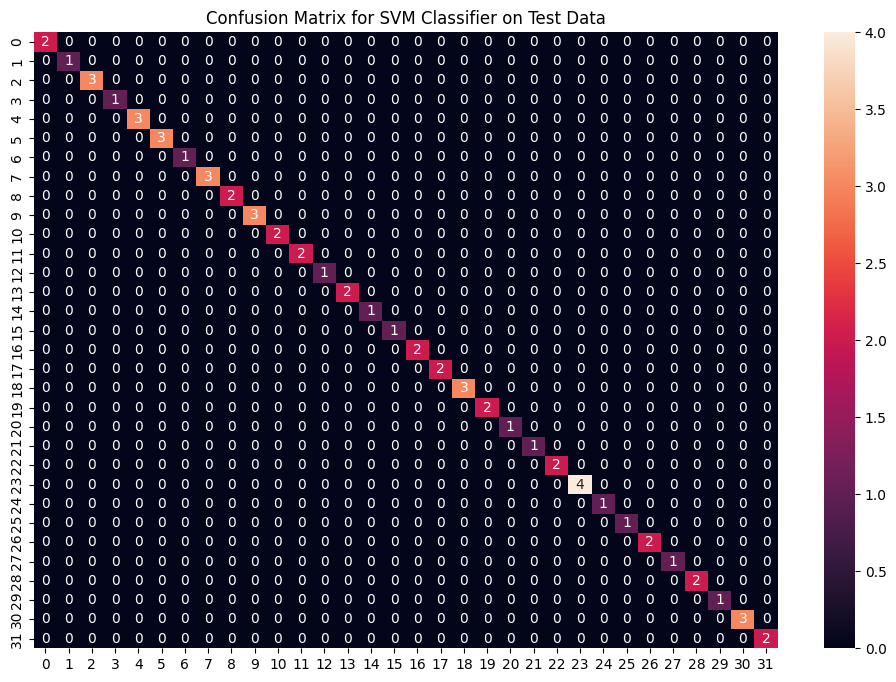

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


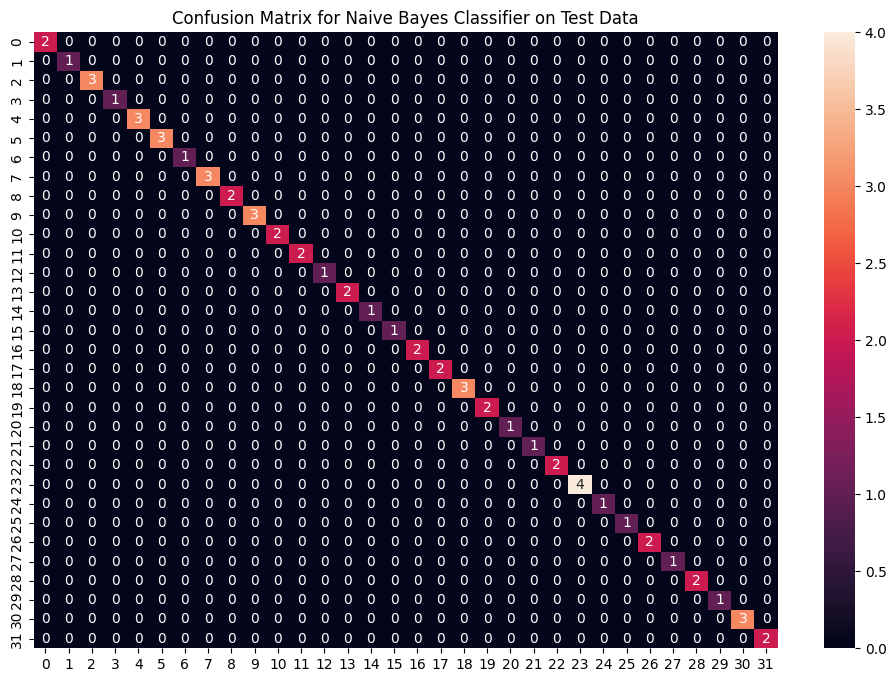

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


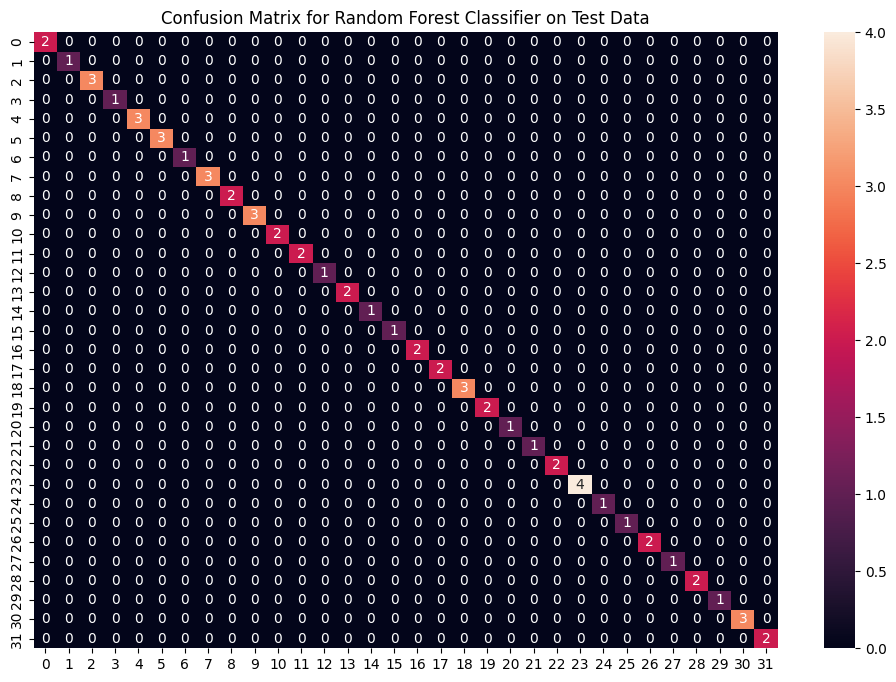

In [115]:
 # Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

# Accuracy on train and test data
print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")

# Confusion Matrix for SVM Classifier
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

# Accuracy on train and test data
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")

# Confusion Matrix for Naive Bayes Classifier
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

# Accuracy on train and test data
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

# Confusion Matrix for Random Forest Classifier
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Accuracy on Test dataset by the combined model: 100.0%


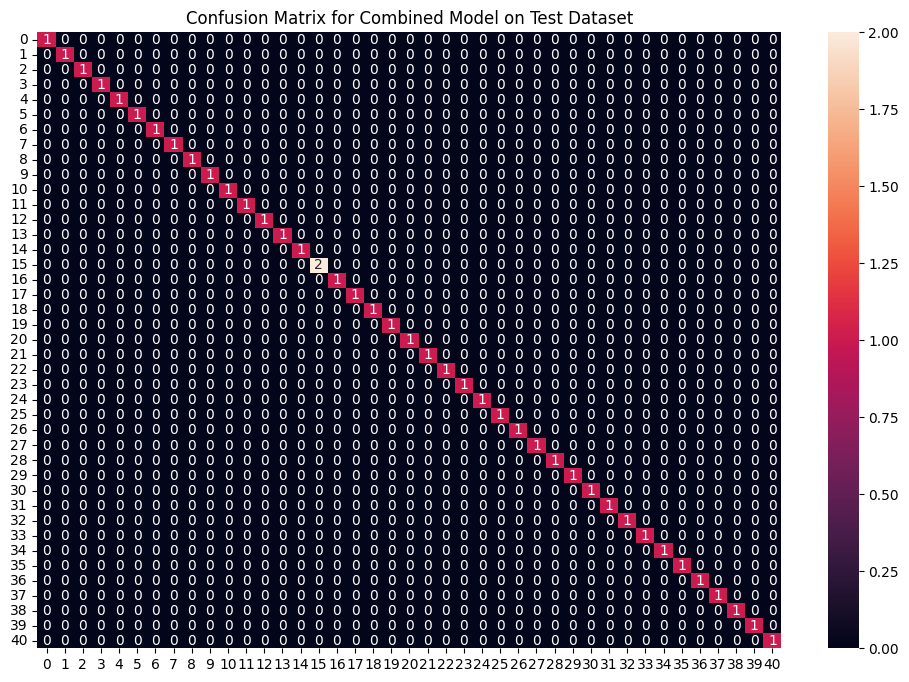

Accuracy on Test dataset by the combined model: 100.0%


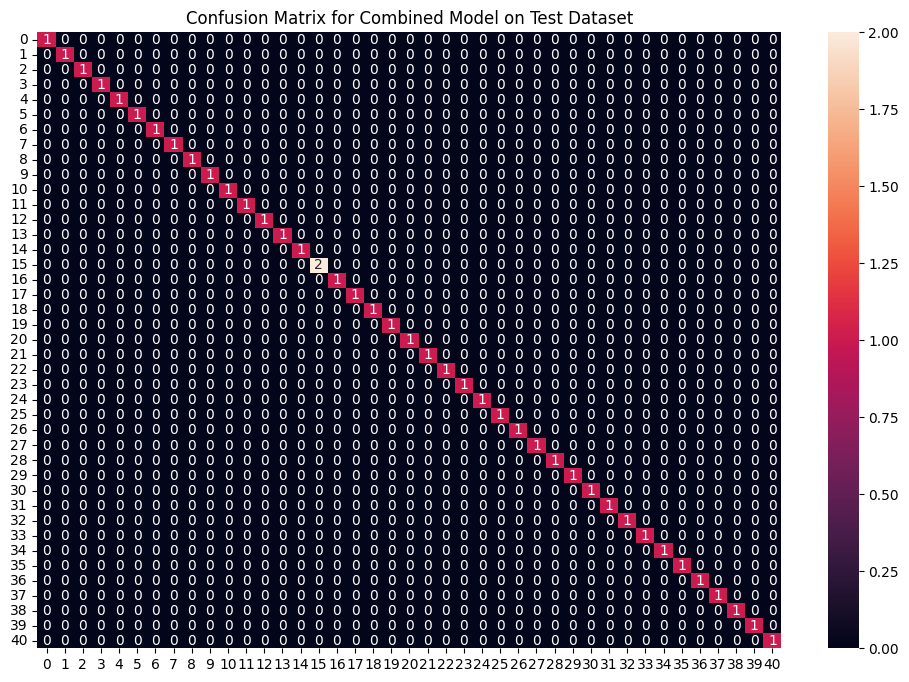

In [117]:
# Training the models on the entire dataset
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)  # SVM model trained on whole data
final_nb_model.fit(X, y)  # Naive Bayes model trained on whole data
final_rf_model.fit(X, y)  # Random Forest model trained on whole data

# Reading the test dataset
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

# Extracting features (X) and target (Y) from the test data
test_X = test_data.iloc[:, :-1]
test_Y = le.transform(test_data.iloc[:, -1])  # Ensure that encoder is already fit

# Making predictions using each classifier
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Install scipy if not already installed (for using stats.mode)
!pip install scipy
from scipy import stats

# Combining predictions by taking the mode of the 3 models' predictions
final_preds = [stats.mode([i, j, k])[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Calculate accuracy of the combined model
accuracy = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy*100}%")

# Generate and visualize confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()
# Training the models on the entire dataset
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)  # SVM model trained on whole data
final_nb_model.fit(X, y)  # Naive Bayes model trained on whole data
final_rf_model.fit(X, y)  # Random Forest model trained on whole data

# Reading the test dataset
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

# Extracting features (X) and target (Y) from the test data
test_X = test_data.iloc[:, :-1]
test_Y = le.transform(test_data.iloc[:, -1])  # Ensure that encoder is already fit

# Making predictions using each classifier
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Install scipy if not already installed (for using stats.mode)
!pip install scipy
from scipy import stats

# Combining predictions by taking the mode of the 3 models' predictions
final_preds = [stats.mode([i, j, k])[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Calculate accuracy of the combined model
accuracy = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy*100}%")

# Generate and visualize confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [120]:
import numpy as np
import pandas as pd
import statistics

# Assuming 'symptom_index' and 'encoder' are already defined

def predictDisease(symptoms):
    symptoms = symptoms.split(",")  # Split the input string into a list of symptoms

    # Initialize a binary input vector
    input_data = [0] * len(data_dict["symptom_index"])

    # Map the symptoms to indices and update the input vector
    for symptom in symptoms:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1

    # Convert input data to a pandas DataFrame with correct column names
    input_data = pd.DataFrame([input_data], columns=X.columns)

    # Get individual model predictions
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Combine predictions by taking the mode (most common prediction)
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])

    # Return the predictions in a dictionary
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }

    return predictions

# Example usage
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


In [121]:
import joblib

# Saving the final model
joblib.dump(final_rf_model, 'final_rf_model.joblib')
joblib.dump(final_nb_model, 'final_nb_model.joblib')
joblib.dump(final_svm_model, 'final_svm_model.joblib')
joblib.dump(data_dict, 'data_dict.joblib')  # Save the symptom index and class mapping


['data_dict.joblib']

In [122]:
pip install flask


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
import statistics

# Load the saved models and data_dict
final_rf_model = joblib.load('final_rf_model.joblib')
final_nb_model = joblib.load('final_nb_model.joblib')
final_svm_model = joblib.load('final_svm_model.joblib')
data_dict = joblib.load('data_dict.joblib')

app = Flask(__name__)

# Endpoint to predict disease
@app.route('/predict', methods=['POST'])
def predict_disease():
    try:
        # Get symptoms from the POST request (expecting a JSON object)
        data = request.get_json()
        symptoms = data['symptoms']

        # Convert symptoms into binary feature vector
        input_data = [0] * len(data_dict["symptom_index"])
        for symptom in symptoms:
            index = data_dict["symptom_index"].get(symptom.capitalize(), -1)
            if index != -1:
                input_data[index] = 1

        # Convert the input data into numpy array
        input_data = np.array(input_data).reshape(1, -1)

        # Make predictions from all models
        rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
        nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
        svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]


        final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])


        predictions = {
            "rf_model_prediction": rf_prediction,
            "naive_bayes_prediction": nb_prediction,
            "svm_model_prediction": svm_prediction,
            "final_prediction": final_prediction
        }

        return jsonify(predictions)

    except Exception as e:
        return jsonify({"error": str(e)}), 400


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
